In [2]:
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline


from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
r=pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

In [4]:
r.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [5]:
r.shape

(32754, 20)

<strong> EDA and Cleaning Dataset </strong>

In [6]:
del r['Unnamed: 14']
del r['Unnamed: 15']
del r['Unnamed: 16']
del r['Unnamed: 17']
del r['Unnamed: 18']
del r['Unnamed: 19']

In [7]:
r

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster


In [8]:
r = r.rename(columns = {
        'Entry Id':'Entry Id',
        'Please indicate your gender.':'Gender',
        'Please select the category that includes your age.':'AgeGroup',
        'What is your marital status?':'MaritalStatus',
        'What best describes your employment status?':'EmploymentStatus',
        'Are you or have you ever been in military service?':'MilitaryService',
        'Do you currently have children under the age of 18 living in your household?':'ChildrenUnder18',
        'What best describes your level of education?':'EducationLevel',
        'Treated country data':'Country',
        '(For U. S. redditors) In which state do you live?':'US_State',
        'Which one of the following ranges includes your total yearly household income before taxes?':'AnnualIncome',
        'treated subreddit data':'SuberedditData', 
        'Are you a dog or a cat person?':'CatOrDog',
        'If you were a cheese, what cheese would you be?':'WhatCheese?'})

In [9]:
r

,Entry Id,Gender,AgeGroup,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnder18,EducationLevel,Country,US_State,AnnualIncome,SuberedditData,CatOrDog,WhatCheese?
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster


In [12]:
r.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

In [13]:
r[r.Gender.isnull()]

,Entry Id,Gender,AgeGroup,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnder18,EducationLevel,Country,US_State,AnnualIncome,SuberedditData,CatOrDog,WhatCheese?


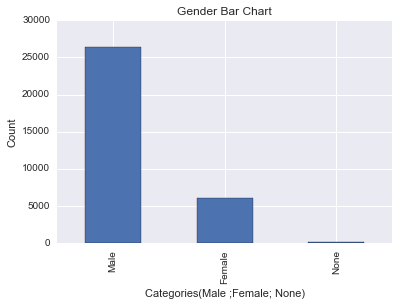

In [14]:
Gender_plot = r.Gender.value_counts().plot(kind = 'bar' )
Gender_plot.set_title("Gender Bar Chart")
Gender_plot.set_xlabel("Categories(Male ;Female; None)")
Gender_plot.set_ylabel("Count")

In [15]:
r.AgeGroup.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: AgeGroup, dtype: int64

In [17]:
r.AgeGroup.describe()

count     32754
unique        8
top       18-24
freq      15802
Name: AgeGroup, dtype: object

In [18]:
r[r.AgeGroup.isnull()]

,Entry Id,Gender,AgeGroup,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnder18,EducationLevel,Country,US_State,AnnualIncome,SuberedditData,CatOrDog,WhatCheese?


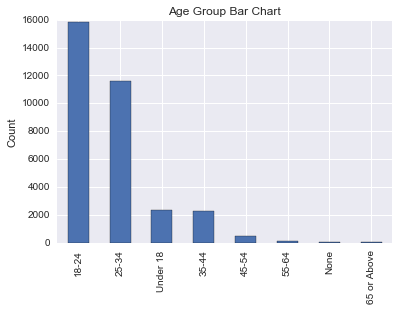

In [19]:
AgeGroup = r.AgeGroup.value_counts().plot(kind = 'bar' )
AgeGroup.set_title("Age Group Bar Chart")
AgeGroup.set_xlabel("")
AgeGroup.set_ylabel("Count")

In [10]:
r.MaritalStatus.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: MaritalStatus, dtype: int64

In [11]:
r = r[ -(r.MaritalStatus == 'Blank')] 

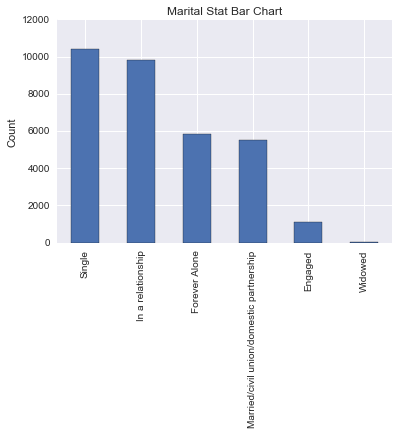

In [12]:
M_S = r.MaritalStatus.value_counts().plot(kind = 'bar' )
M_S.set_title("Marital Stat Bar Chart")
M_S.set_xlabel("")
M_S.set_ylabel("Count")

In [26]:
r.EmploymentStatus.value_counts()

Employed full time                       14811
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1946
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: EmploymentStatus, dtype: int64

In [28]:
r.EmploymentStatus.describe()

count                  32749
unique                     7
top       Employed full time
freq                   14811
Name: EmploymentStatus, dtype: object

In [29]:
r[r.EmploymentStatus.isnull()]

,Entry Id,Gender,AgeGroup,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnder18,EducationLevel,Country,US_State,AnnualIncome,SuberedditData,CatOrDog,WhatCheese?


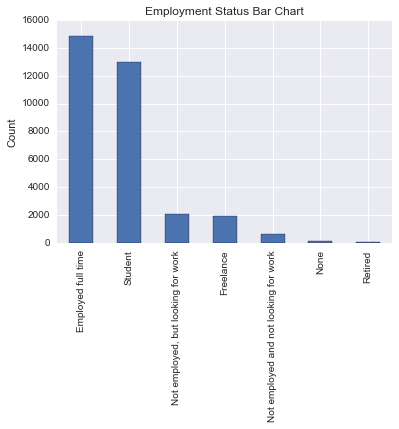

In [30]:
E_S = r.EmploymentStatus.value_counts().plot(kind = 'bar' )
E_S.set_title("Employment Status Bar Chart")
E_S.set_xlabel("")
E_S.set_ylabel("Count")

In [31]:
r.MilitaryService.value_counts()

No     30526
Yes     2223
Name: MilitaryService, dtype: int64

In [32]:
r.MilitaryService.describe()

count     32749
unique        2
top          No
freq      30526
Name: MilitaryService, dtype: object

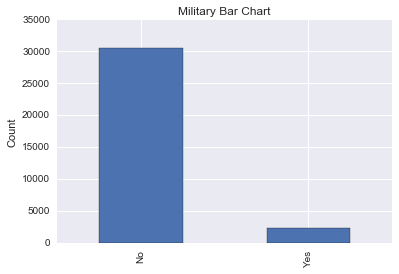

In [33]:
M_S = r.MilitaryService.value_counts().plot(kind = 'bar' )
M_S.set_title("Military Bar Chart")
M_S.set_xlabel("")
M_S.set_ylabel("Count")

In [34]:
r. ChildrenUnder18.value_counts()

No      27483
Yes      5047
None      219
Name: ChildrenUnder18, dtype: int64

In [35]:
r[r.ChildrenUnder18.isnull()]

,Entry Id,Gender,AgeGroup,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnder18,EducationLevel,Country,US_State,AnnualIncome,SuberedditData,CatOrDog,WhatCheese?


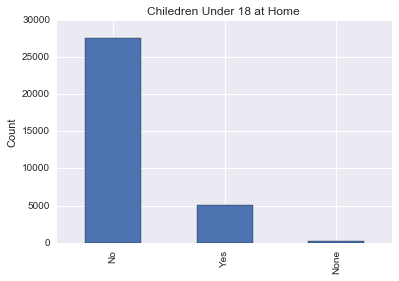

In [37]:
Children_Under18 = r.ChildrenUnder18.value_counts().plot(kind = 'bar' )
Children_Under18.set_title("Chiledren Under 18 at Home ")
Children_Under18.set_xlabel("")
Children_Under18.set_ylabel("Count")

In [38]:
r. EducationLevel.value_counts()

Bachelor's degree                     11042
Some college                           9599
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: EducationLevel, dtype: int64

In [39]:
r. EducationLevel.describe()

count                 32749
unique                    8
top       Bachelor's degree
freq                  11042
Name: EducationLevel, dtype: object

In [40]:
r[r.EducationLevel.isnull()]

,Entry Id,Gender,AgeGroup,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnder18,EducationLevel,Country,US_State,AnnualIncome,SuberedditData,CatOrDog,WhatCheese?


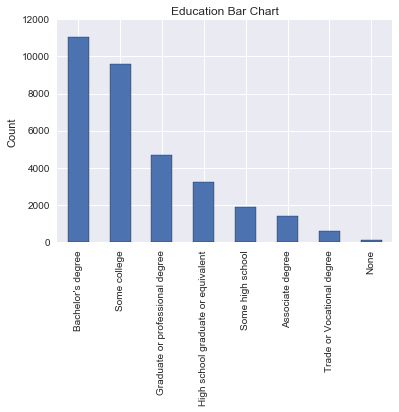

In [41]:
Education_Level = r.EducationLevel.value_counts().plot(kind = 'bar' )
Education_Level.set_title("Education Bar Chart")
Education_Level.set_xlabel("")
Education_Level.set_ylabel("Count")

In [42]:
r.Country.value_counts()

United States                       20962
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [43]:
r.Country.describe()

count             32749
unique              440
top       United States
freq              20962
Name: Country, dtype: object

In [44]:
r[r.Country.isnull()]

,Entry Id,Gender,AgeGroup,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnder18,EducationLevel,Country,US_State,AnnualIncome,SuberedditData,CatOrDog,WhatCheese?


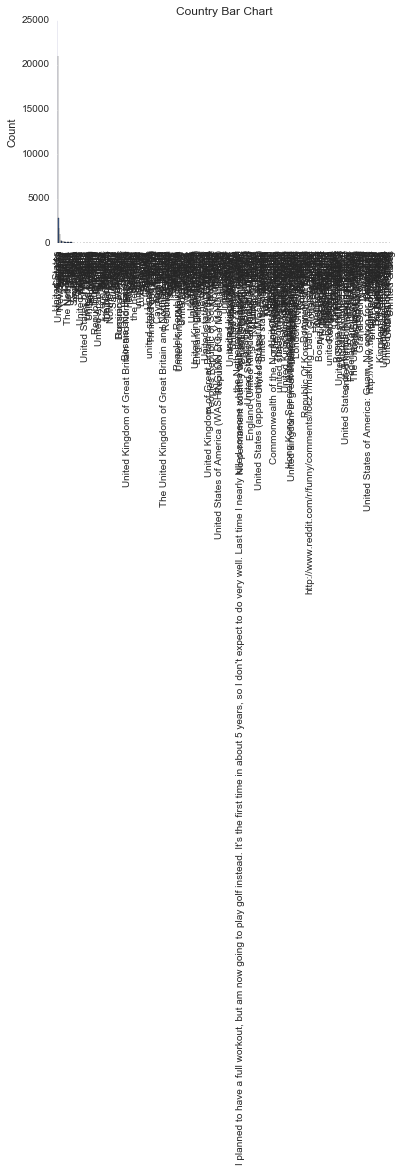

In [45]:
Country = r.Country.value_counts().plot(kind = 'bar' )
Country.set_title("Country Bar Chart")
Country.set_xlabel("")
Country.set_ylabel("Count")

In [46]:
r. AnnualIncome.value_counts()

Under $20,000          7891
$50,000 - $69,999      4133
$70,000 - $99,999      4100
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2692
$40,000 - $49,999      2686
none                   1615
Name: AnnualIncome, dtype: int64

In [47]:
r. AnnualIncome.describe()

count             32749
unique                9
top       Under $20,000
freq               7891
Name: AnnualIncome, dtype: object

In [49]:
r[r.AnnualIncome.isnull()]

,Entry Id,Gender,AgeGroup,MaritalStatus,EmploymentStatus,MilitaryService,ChildrenUnder18,EducationLevel,Country,US_State,AnnualIncome,SuberedditData,CatOrDog,WhatCheese?


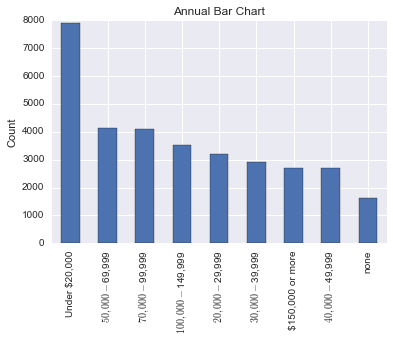

In [50]:
Annual_Income=r. AnnualIncome.value_counts().plot(kind = 'bar' )
Annual_Income.set_title("Annual Bar Chart")
Annual_Income.set_xlabel("")
Annual_Income.set_ylabel("Count")

In [51]:
r.SuberedditData.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1206
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

In [13]:
del r["SuberedditData"]
del r["Entry Id"]

In [14]:
r.columns

Index([u'Gender', u'AgeGroup', u'MaritalStatus', u'EmploymentStatus',
       u'MilitaryService', u'ChildrenUnder18', u'EducationLevel', u'Country',
       u'US_State', u'AnnualIncome', u'CatOrDog', u'WhatCheese?'],
      dtype='object')

In [15]:
r.CatOrDog.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
askreddit              2
 Reddit.com            1
movies                 1
Name: CatOrDog, dtype: int64

In [16]:
r.CatOrDog.describe()

count            32747
unique               6
top       I like dogs.
freq             17149
Name: CatOrDog, dtype: object

In [17]:
r.loc[r['CatOrDog'] == 'I like turtles.', 'CatOrDog'] = 'None'
r.loc[r['CatOrDog'] == 'askreddit.', 'CatOrDog'] = 'None'
r.loc[r['CatOrDog'] == 'askreddit', 'CatOrDog'] = 'None'
r.loc[r['CatOrDog'] == ' Reddit.com', 'CatOrDog'] = 'None'
r.loc[r['CatOrDog'] == 'movies', 'CatOrDog'] = 'None'

C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopy

In [18]:
r.CatOrDog.value_counts()

I like dogs.    17149
I like cats.    11152
None             4446
Name: CatOrDog, dtype: int64

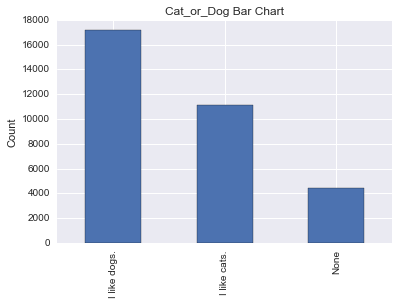

In [19]:
Cat_or_Dog =r.CatOrDog.value_counts().plot(kind = 'bar' )
Cat_or_Dog.set_title("Cat_or_Dog Bar Chart")
Cat_or_Dog.set_xlabel("")
Cat_or_Dog.set_ylabel("Count")

In [20]:
r.WhatCheese?.value_counts()

SyntaxError: invalid syntax (<ipython-input-20-dc2622f420fc>, line 1)

In [21]:
r = r.rename(columns = {'WhatCheese?':'WhatCheese'})

In [22]:
r.WhatCheese.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
 f7u12              2
 Pics               1
 awww               1
1                   1
programming')       1
Name: WhatCheese, dtype: int64

In [23]:
r.loc[r['WhatCheese'] == ' f7u12', 'WhatCheese'] = 'None'
r.loc[r['WhatCheese'] == '1', 'WhatCheese'] = 'None'
r.loc[r['WhatCheese'] == "programming')", 'WhatCheese'] = 'None'
r.loc[r['WhatCheese'] == ' awww', 'WhatCheese'] = 'None'
r.loc[r['WhatCheese'] == ' Pics', 'WhatCheese'] = 'None'
r.loc[r['WhatCheese'] == 'None', 'WhatCheese'] = 'None'

In [24]:
r.WhatCheese.value_counts()

Other        6562
Cheddar      6101
Brie         3742
Provolone    3454
Swiss        3214
Feta         2991
Goat         2516
Munster      1770
American     1438
Paneer        618
Limburger     337
None            6
Name: WhatCheese, dtype: int64

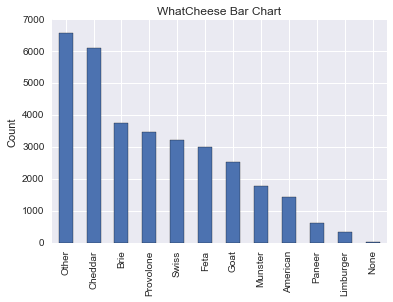

In [25]:
What_Cheese=r.WhatCheese.value_counts().plot(kind = 'bar' )
What_Cheese.set_title("WhatCheese Bar Chart")
What_Cheese.set_xlabel("")
What_Cheese.set_ylabel("Count")

<strong> Aggregate Country and the Continent. </strong>

In [26]:
Asia=['Afghanistan' ,'Armenia','Azerbaijan','Bahrain','Bangladesh' ,'Bhutan' ,
      'Brunei', 'Cambodia','China', 'Cyprus' , 'Georgia', 'India', 'Indonesia' , 'Iran', 'Iraq', 'Israe' , 'Japan', 
      'Jordan' , 'Kazakhstan' , 'Kuwait', 'Kyrgyzstan' , 'Laos', 'Lebanon', 'Malaysia' , 'Maldives', 'Mongolia', 'Myanmar' ,
      'Nepal' ,'North Korea', 'Oman','Pakistan', 'Palestine' ,'Philippines', 'Qatar','Russia', 'Saudi Arabia', 'Singapore',
      'South Korea','Sri Lanka', 'Syria' , 'Taiwan', 'Tajikistan' , 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 
      'United Arab Emirates', 'Uzbekistan' , 'Vietnam' , 'Yemen','Israel','Kuwait','india','thailand', 'Korea, South'
      'JAPAN', 'INDIA','japan','malaysia','Hong Kong'
     ]
Africa=[
    'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde',
'Cameroon','Central African Republic','Chad',
'Comoros','Democratic Republic of the Congo','Republic of the Congo',
'Cote d Ivoire','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea',
'Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco',
'Mozambique','Namibia','Niger','Nigeria', 'Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone',
'Somalia','South Africa','South Sudan','Sudan','Swaziland' ,'Tanzania','Togo','Tunisia','Uganda' ,'Zambia','Zimbabwe'
        ]
Antartica=['Antarctica']
Australia=['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau',
           'Papua New Guinea' ,'Samoa', 'Solomon Islands' ,'Tonga' ,'Tuvalu' ,'Vanuatu','australia']
Europe=['United kingom','United kingdom ','Croatua','switzerland','ITALY IT','england','England','SPAIN','Itaky',
        'Scotland and Sweden','NORWAY', 'DENMARK','Austria','austria'
       'United kingdom of great britain and northern Ireland','Unitd Kingdom',
        'british virgin islands','BG','Denmark ','Serbia','serbia','UNited Kingdom','Galiza','The Netherlands','Netherlands, the',
       'Belgrium', 'slovenia','united kingdom / scotland', 'United Kingdom of Great Britain','uk','Czech republic',
        'United Kingdo,','Great Britian ','the Netherlands (a.k.a. Holland)',
        'Slovak Republic','Norway.','Australia and United Kingdom','IRELAND','England (United Kingdom is not a country)',
        'Bosnia And Herzegovina','Catalonia','new Zealand ','Newzealand ', 'FUNLAND','Belgrium','slovenia',
        'Republic of Ireland','Republic of Ireland ','BELGIUM','Peoples Republic of South Yorkshire',
        'United Kingdon', 'wales','norway', 'Swedeb','Netehrlands','Kingdom of Norway',
         'Holland','Federal Republic of Germany','United Kingdom (England)', 'United KIngdom',
        'England','Scotland','FRANCE','romania','Northern Ireland','sweden','Sweden',
        'Federal Republic of Germany','The NEtherlands','denmark','FUNLAND','Belgrium','Nether',
        'Commonwealth of the Northern Mariana Islands','Helsinki','U.K lol', 'scotland',
        'UK','U.K.','estonia','London United Kingdom','Frande','poland', 'U.K. Problem?',
        'Lithuania/United Kingdom','Kosova','Kosovo','U.K','United ','Denmark','United Kingdom','Belgium','Italy','italy','Romania',
           'Germany', 'France', 'Greece', 'Switzerland','Netherlands', 'Bulgaria', 'Spain', 'Poland', 'Finland',
         'the Netherlands','Slovenia','Iceland','Bosnia and Herzegovina','Croatia','united kingdom',
          'New Zealand','Estonia','Puerto Rico','Portugal','Slovakia','Ukraine', 'Macedonia','Czech Republic',
        'Lithuania','United Kingdom (Scotland)','Swiss','Bermuda','Dominica','United Jingdom', 'Gibraltar', 'ireland',
         'Hungary','Uninted Kingdom','Isle of Man','Luxembourg','Swedem','Wales', 'Latvia', 'POLAND',
           'u.k', 'United  Kingdom', 'spain', 'germany','new zealand','Equestria',
           'United Kingdom of Great Britain and Northern Ireland','Republic of Poland', 'Honduras','ENGLAND', 'GErmany', 'greece',  
         'Ger','finland','iceland','belgium', 'Sweden ','Republic Of Ireland','England ','Great Britain','New zealand', 'New Zealand ',
        'The United Kingdom of Great Britain and Northern Ireland','Albania',
        'Grand Duchy of Baden','United Kingdown','Faroe Islands','Portugal',
       'Untied Kingdom ', 'The Czech Republic','Montenegro','Antigua and Barbuda','United Kindom',' United Kingdom',
        'The Republic of Ireland', 'Australia ','Andorra','czech republic','Untied Kingdom','St.Vincent', 'Ireland ',
        'united kingdom of great Britain ','UNITED KINGDOM','united kingdom ','Unted Kingdom','New Zealanad','United Knigdom', 
        'Finland ', 'netherlands','The Netherlands ','Bosnia and Herzegowina','united kingdom, Spain ',
        'ITALY','croatia','Belarus','United Kingdom, India','Portugal ',
          'Ireland','United Kingdom ','Malta','france','United kingdom,England, United Kingdom','United kingdom',
            'England, United Kingdom','Germany ','Republic of Moldova','the netherlands',
            'United Kingdom of Great Britain & Northern Ireland','Frabce','Swden','Moldova']
North_America=['United States','canada','Trinidad and TObago','Commonwealth of the Northern Mariana Islands',
               'Republic of the Marshall Islands','united states of America ','Amurika',
               'Belgium/Canada','america','haiti','United Strate','Canada, Eh','United s',
               'The Dominion of Canada','United States (Guam)','Ontario, Canada','united states (my state is APO) ',
               'Mx','Mexico','mexico','Canada, Bitches.','United States of America (Washington, DC)',
               'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
               "United States (apparently I can't put D.C. as my state)",'united states', 'united states :f',
               'United States, District of Columbia','U S A','USVI','america','united Sr','Idaho'
               ,'Canada (currently Korea)','Canada','CANADA','Norway',
               'United states of America. ','Costa Rica','M\xc3\xa9xico','Barbados','Canada, eh?',
                'United states of America', 'United States of ', 
                'United States of America (DC)','Trinidad & Tobago',
                'Belize','Dominion of Canada', 'Toronto','El Salvador','Canadia','Trinidad and Tobago',
                'Cayman Islands','Amerikka', 'Guatemala','United States ', 'US','united stateds','Amerikka', 'Guatemala','MEXICO  ',
               'United States of America: Guam. No option for territories :(','United states',
                'Sint Maarten','united sates','The United States of America','Usa', 'United st','Mexico ',
                'united States','Unnited States','Bahamas',' Canada','canada ', 'United States of America ', 
                'United States Of America', 'Guam', 'usa','greenland','Camada','U.S.A.','Canda','Unites States','Panama',
              'United Sates','Canada ','united states of america','United States of America', 'Cananda',
              'United States of American','United States (Washington, DC)','united states of American', 
               'Nicaragua','MEXICO','USA',' Canada eh'] 
South_America=['Chile','Argentina','Bolivia','Brazil','Colombia','Ecuador',
               'French Guiana','Guyana','Paraguay','brazil','Brasil','chile','Uruguay ','venezuela','Peru','Suriname','argentina','colombia','Venezuela',
               'ecuador','Brazilf','Uruguay']

In [27]:
Continents = []
NOT_present=[]
for i in r['Country']:
    cont=''
    try:
        cont=transformations.cn_to_ctn(i)
        Continents.append[cont]
    except:
        if(i in Asia):
            cont="Asia"
            Continents.append(cont)
        elif(i in Africa):
            cont="Africa"
            Continents.append(cont)
        elif(i in Australia):
            cont="Australia"
            Continents.append(cont)
        elif(i in Antartica): 
            cont="Antartica"
            Continents.append(cont)
        elif(i in Europe):
            cont="Europe"
            Continents.append(cont)
        elif(i in North_America):
            cont="North America"
            Continents.append(cont)
        elif(i in South_America):
            cont="South America"
            Continents.append(cont)
        else:
            cont="None" 
            Continents.append(cont) 
            NOT_present.append(i)

In [28]:
Continents

['North America',
 'Europe',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'Europe',
 'North America',
 'Europe',
 'North America',
 'North America',
 'Australia',
 'North America',
 'North America',
 'North

In [31]:
r['Continents']=Continents
del r['US_State']

In [32]:
r.Continents.value_counts()

North America    24592
Europe            5247
Australia         1392
Asia               841
South America      281
None               279
Africa             115
Antartica            2
Name: Continents, dtype: int64

In [33]:
r.Continents.describe()

count             32749
unique                8
top       North America
freq              24592
Name: Continents, dtype: object

In [34]:
from string import letters
Num_Var = list(r.dtypes[r.dtypes != "object"].index)
r[Num_Var].head()

""
5
6
7
8
9


<strong> Dependent Variable: Military Service </strong>

In [35]:
r.MilitaryService.value_counts()

No     30526
Yes     2223
Name: MilitaryService, dtype: int64

In [36]:
y = r['MilitaryService']
del r["MilitaryService"]
del r["WhatCheese"]
del r["Country"]
del r["CatOrDog"]

In [37]:
y.head()

5    No
6    No
7    No
8    No
9    No
Name: MilitaryService, dtype: object

In [38]:
r.columns

Index([u'Gender', u'AgeGroup', u'MaritalStatus', u'EmploymentStatus',
       u'ChildrenUnder18', u'EducationLevel', u'AnnualIncome', u'Continents'],
      dtype='object')

Graphing the result.....

In [39]:
def categorical_desc(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
categorical_desc(r)

,Gender,AgeGroup,MaritalStatus,EmploymentStatus,ChildrenUnder18,EducationLevel,AnnualIncome,Continents
count,32749,32749,32749,32749,32749,32749,32749,32749
unique,3,8,6,7,3,8,9,8
top,Male,18-24,Single,Employed full time,No,Bachelor's degree,"Under $20,000",North America
freq,26415,15801,10428,14811,27483,11042,7891,24592


In [40]:
categorical_var = ['Gender','AgeGroup','EmploymentStatus','MaritalStatus',
       'ChildrenUnder18', 'EducationLevel', 'AnnualIncome','Continents']

In [41]:
for variable in categorical_var:
    # Create array of dummies
    dummies = pd.get_dummies(r[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    r = pd.concat([r, dummies], axis=1)
    r.drop([variable], axis=1, inplace=True)

In [42]:
r.isnull().sum()

Gender_Female                                             0
Gender_Male                                               0
Gender_None                                               0
AgeGroup_18-24                                            0
AgeGroup_25-34                                            0
AgeGroup_35-44                                            0
AgeGroup_45-54                                            0
AgeGroup_55-64                                            0
AgeGroup_65 or Above                                      0
AgeGroup_None                                             0
AgeGroup_Under 18                                         0
EmploymentStatus_Employed full time                       0
EmploymentStatus_Freelance                                0
EmploymentStatus_None                                     0
EmploymentStatus_Not employed and not looking for work    0
EmploymentStatus_Not employed, but looking for work       0
EmploymentStatus_Retired                

In [43]:
correlation = r.corr()

In [44]:
correlation

,Gender_Female,Gender_Male,Gender_None,AgeGroup_18-24,AgeGroup_25-34,AgeGroup_35-44,AgeGroup_45-54,AgeGroup_55-64,AgeGroup_65 or Above,AgeGroup_None,...,"AnnualIncome_Under $20,000",AnnualIncome_none,Continents_Africa,Continents_Antartica,Continents_Asia,Continents_Australia,Continents_Europe,Continents_None,Continents_North America,Continents_South America
Gender_Female,1.000000,-0.980283,-0.037723,0.047602,-0.032738,-0.027090,0.009549,0.010535,0.017870,-0.008285,...,0.051836,-0.013174,-0.007325,-0.003751,-0.024492,-0.020052,-0.094233,-0.016393,0.107426,-0.021745
Gender_Male,-0.980283,1.000000,-0.160480,-0.040059,0.031854,0.027018,-0.008752,-0.009388,-0.020601,-0.067173,...,-0.049315,0.004769,0.008158,0.003827,0.024759,0.019631,0.093542,-0.009285,-0.101473,0.022085
Gender_None,-0.037723,-0.160480,1.000000,-0.035193,0.002439,-0.001316,-0.003440,-0.005149,0.014918,0.381090,...,-0.009537,0.041689,-0.004665,-0.000614,-0.002871,0.000885,-0.002349,0.128843,-0.023446,-0.003072
AgeGroup_18-24,0.047602,-0.040059,-0.035193,1.000000,-0.713717,-0.262697,-0.120473,-0.063267,-0.041367,-0.050120,...,0.261441,0.019130,-0.009799,-0.007546,-0.035067,0.001932,-0.004767,-0.018361,0.023689,-0.010984
AgeGroup_25-34,-0.032738,0.031854,0.002439,-0.713717,1.000000,-0.201102,-0.092225,-0.048433,-0.031668,-0.038368,...,-0.189267,-0.086331,0.012276,0.010573,0.040327,-0.002162,0.004025,0.004464,-0.023772,0.017811
AgeGroup_35-44,-0.027090,0.027018,-0.001316,-0.262697,-0.201102,1.000000,-0.033945,-0.017827,-0.011656,-0.014122,...,-0.117490,-0.014643,-0.001886,-0.002126,0.003841,0.006612,0.016558,0.001012,-0.017235,-0.005706
AgeGroup_45-54,0.009549,-0.008752,-0.003440,-0.120473,-0.092225,-0.033945,1.000000,-0.008175,-0.005345,-0.006476,...,-0.055768,0.002576,-0.003205,-0.000975,-0.010828,-0.002880,-0.023329,-0.008861,0.028756,-0.006218
AgeGroup_55-64,0.010535,-0.009388,-0.005149,-0.063267,-0.048433,-0.017827,-0.008175,1.000000,-0.002807,-0.003401,...,-0.023785,-0.001954,0.004022,-0.000512,-0.004720,-0.004526,-0.017137,-0.000981,0.019339,-0.006096
AgeGroup_65 or Above,0.017870,-0.020601,0.014918,-0.041367,-0.031668,-0.011656,-0.005345,-0.002807,1.000000,-0.002224,...,-0.007442,-0.006460,0.033669,-0.000335,-0.006955,-0.001948,-0.005087,0.003798,0.003211,-0.003986
AgeGroup_None,-0.008285,-0.067173,0.381090,-0.050120,-0.038368,-0.014122,-0.006476,-0.003401,-0.002224,1.000000,...,-0.014074,0.091697,-0.003081,-0.000406,-0.008427,0.003683,-0.003376,0.200564,-0.036936,-0.004829


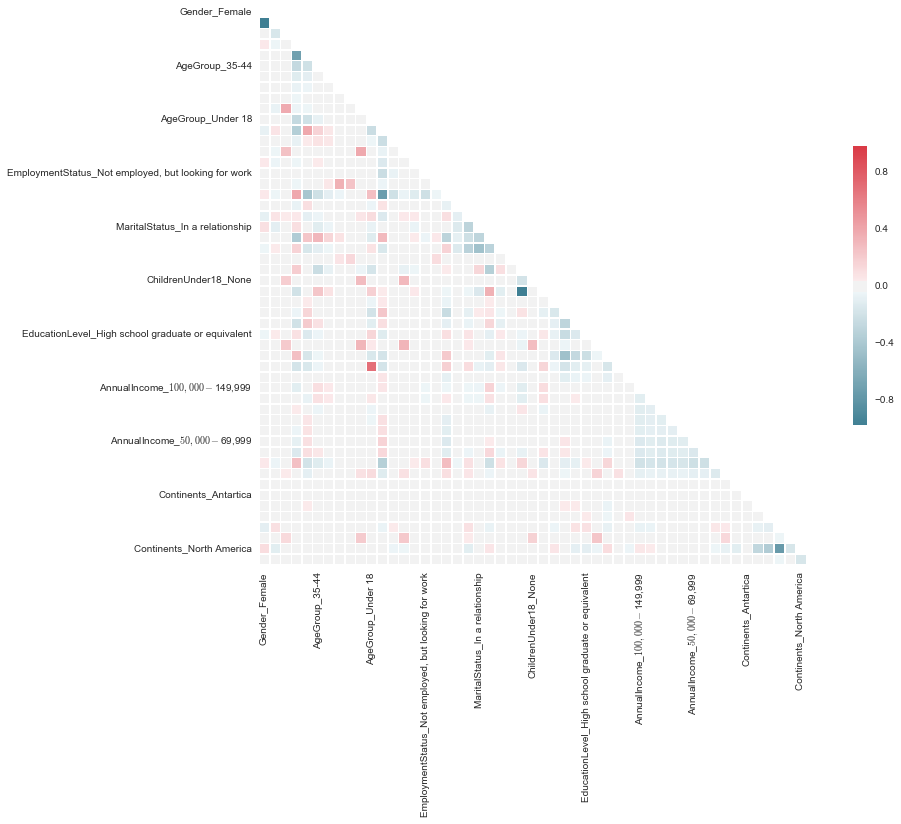

In [45]:
#lets plot the variables to understand which variables are highly collinear
from string import letters
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")

#Lets calculate the corelation matrix 
correlation = r.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3,square=True, 
            xticklabels=5, yticklabels=5,linewidths=.5, 
            cbar_kws={"shrink": .5}, ax=ax)

In [46]:
x_train,x_test,x1_train,x1_test=train_test_split(r,y,test_size=0.4)

In [47]:
x_train.shape

(19649, 52)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(x_train,x1_train)
result=classifier.predict(x_test)

In [49]:
result

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [50]:
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
# Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
sklearn.metrics.confusion_matrix(x1_test,result)

array([[11900,   312],
       [  815,    73]])

In [51]:
sklearn.metrics.accuracy_score(x1_test, result)

0.91396946564885495